In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = np.loadtxt('/content/drive/MyDrive/IR_Assignment_data/Data_ass2/Wiki-Vote.txt', dtype=int, comments='#', delimiter='\t')


In [5]:
# node_map = {}
# for i, node in enumerate(np.unique(data)):
#     node_map[node] = i
node_map = {}
for i, node in enumerate(np.unique([edge[0] for edge in data] + [edge[1] for edge in data])):
    node_map[node] = i



n_nodes = len(node_map)
adj_matrix =pd.DataFrame(np.zeros((n_nodes, n_nodes)),index=node_map.keys(),columns=node_map.keys(),dtype=int)

for i, j in data:
    adj_matrix.loc[i, j] = 1
print(adj_matrix)

      3     4     5     6     7     8     9     10    11    12    ...  8288  \
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     1     0     1     0     0  ...     0   
5        0     0     0     1     0     1     0     1     0     0  ...     0   
6        1     0     0     0     0     1     0     1     0     0  ...     0   
7        0     0     0     1     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
8293     0     0     0     0     0     0     0     0     0     0  ...     0   
8294     0     0     0     0     0     0     0     0     0     0  ...     0   
8295     0     0     0     0     0     0     0     0     0     0  ...     0   
8296     0     0     0     0     0     0     0     0     0     0  ...     0   
8297     0     0     0     0     0     0     0     0     0     0  ...     0   

      8289  8290  8291  8292  8293  8294  8295  829

1.Number of Nodes

In [6]:
nodes = adj_matrix.shape[0]
print(nodes)

7115


2.Number of Edges


In [7]:
num_edges=0
for edge in data:
  num_edges+=1
print(num_edges)

103689


3.Avg In-degree

In [13]:
in_degree=np.sum(adj_matrix, axis=0)
avg_in_degree = np.mean(in_degree)
print(avg_in_degree)

14.573295853829936


4.Avg Out-degree


In [8]:
out_degrees=np.sum(adj_matrix, axis=1)
avg_out_degree=np.mean(out_degrees)
print(avg_out_degree)

14.573295853829936


5.Node with Max In-degree

In [9]:
max_in_degree_node = np.argmax(np.sum(adj_matrix, axis=1))
print(max_in_degree_node)

2356


6.Node with Max out-degree


In [10]:
max_out_degree_node = np.argmax(np.sum(adj_matrix, axis=0))
print(max_out_degree_node)

3649


7.The density of the network


In [11]:
density = num_edges / (n_nodes * (n_nodes - 1))
print(density)

0.0020485375110809584


**Plot degree distribution of the network**

i)For in-degree


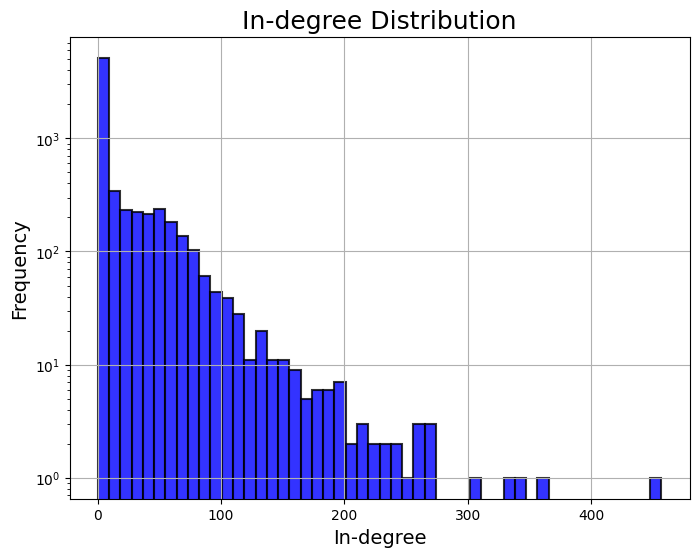

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(in_degree, bins=50, alpha=0.8, color='blue', edgecolor='black', linewidth=1.5,log="true")
ax.set_xlabel('In-degree', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('In-degree Distribution', fontsize=18)
ax.grid(True)
plt.show()

ii) For out degree

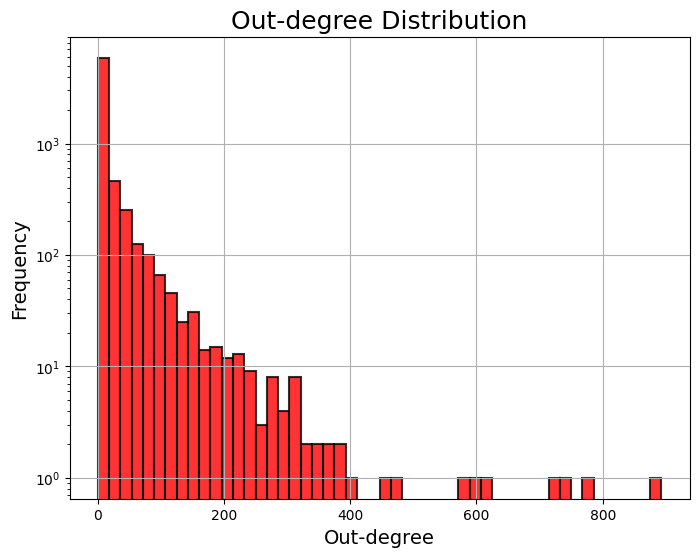

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(out_degrees, bins=50, alpha=0.8, color='red', edgecolor='black', linewidth=1.5,log="true")
ax.set_xlabel('Out-degree', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Out-degree Distribution', fontsize=18)
ax.grid(True)
plt.show()

The local clustering coefficient of each node and plot the clustering-coefficient
distribution (lcc vs frequency of lcc) of the network.

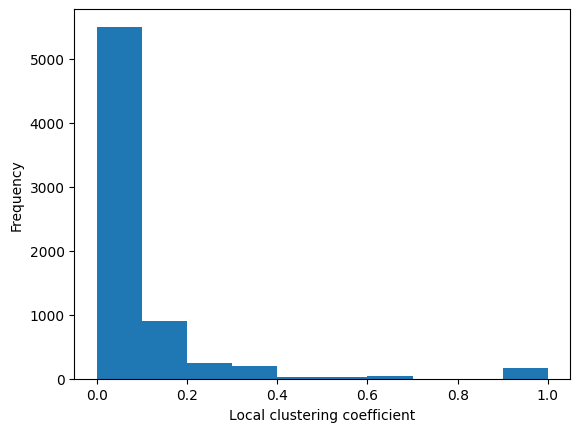

In [17]:
adj_matrix = adj_matrix.rename(columns=node_map, index=node_map)
clustering = {}
for node in node_map:
    neighbors = adj_matrix.loc[node_map[node], adj_matrix.loc[node_map[node]] == 1].index.tolist()
    k = len(neighbors)
    if k > 1:
        E = 0
        for i in range(k):
            for j in range(i+1, k):
                if adj_matrix.loc[neighbors[i], neighbors[j]] == 1:
                    E += 1
        clustering[node] = 2 * E / (k * (k - 1))
    else:
        clustering[node] = 0

# Plot the clustering-coefficient distribution
plt.hist(list(clustering.values()), bins=10)
plt.xlabel('Local clustering coefficient')
plt.ylabel('Frequency')
plt.show()